In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
sns.set()
#sns.set() overrides the standard matplotlib default style

# Simple Linear Regression

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')
#need to make sure the excel file is in the same file

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Define the dependent and independent variables

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore the data

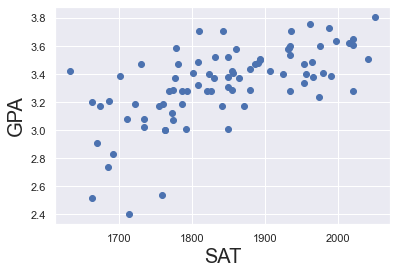

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Regression

The sample formula we have is $\hat{y} = b_0 + b_1x_1$, there is no $x_0$ variable attached to $b_0$, but we can say $x_0 = 1$ always. We do this as it helps in the estimation of $b_0$

In [7]:
x = sm.add_constant(x1)
# x incorporates x0 into the equation, can print x to see
results = sm.OLS(y, x).fit()
#results will contain the output of the Ordinary Least Squares
#(OLS) regression
#fit() will apply a specfic estimation technique (in this case 
#OLS) to obtain the fit of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.20e-11
Time:                        15:30:10   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

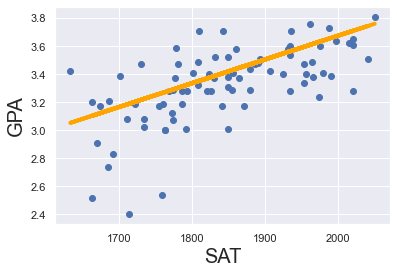

In [8]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275
# 0.0017 is the coef of SAT
# 0.275 os the constant coef
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()
#lw is the linewidth

# Multiple Linear Regression
## Load the data

In [9]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [10]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [11]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Regression

In [12]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]
#This makes a data frame of our dependent variables

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

In [14]:
results.summary()
#In our simple linear regression we had R^2 = 0.406 but the
#adjusted R^2 = 0.399, so we were penalized for adding a
#variable that did not have a strong explanatory power

#We can determine how strong a variable is by looking at its
#p-value. Rand 1,2,3 has a p-value of 0.762 meaning we 
#cannot reject the null hypothesis that b2 = 0

#If a variable is found to be insignificant the whole model
#should be scrapped as the bias of the variable is reflected
#into the coefficients of the others
#Previously the intercept was 0.275, here it is 0.296

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           6.58e-10
Time:                        15:30:10   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummy Variables

In [15]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [16]:
raw_data.head()
#Attendance reflects if a student attended more than 75% of lectures
#Usually we map Yes = 1, No = 0
#Dummy maps categorical to dummy numerical

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [17]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [18]:
data = raw_data.copy()

In [19]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [20]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [21]:
data.describe()
#Since the mean of attendance is below 0.5 this shows there are
#more 0s than 1s

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [22]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           2.19e-15
Time:                        15:30:10   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis
The F-statistic and both are independent variables are significant. Our adjusted R-squared has greatly increased from the 0.399 when we just examined one variable.

#### Attended (Dummy = 1)
$$\hat{y} = 0.6439 + 0.0014*SAT + 0.2226*1$$
$$\implies \hat{y} = 0.8665 + 0.0014*SAT$$

#### Did Not Attend (Dummy = 0)
$$\hat{y} = 0.6439 + 0.0014*SAT + 0.2226*0$$
$$\implies \hat{y} = 0.6439 + 0.0014*SAT$$

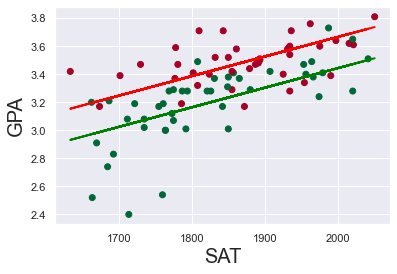

In [25]:
plt.scatter(data['SAT'],y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = 'green')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = 'red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

- We have two equations with the same slope but different intercepts
- On average, the GPA of those who attended is 0.2226 higher. (0.2226 is the coefficient of the dummy variable)

# How to make predictions on the regressions we create

In [27]:
x
#this is the variable from above
#it is a data frame with 3 columns; a constant, SAT, Attendance

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [28]:
# Now we create a dataframe for our predictions
# We have Bob who got 1700 on the SAT and did NOT attend
# And Alice who got 1670 on the SAT and did attend

In [30]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
#We do this because Python will list the columns in alphabetical
#order otherwise
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [31]:
#this is not a necessary step
#indices are lost if you use e.g. numpy transformations
#on the whole data frame
new_data.rename(index = {0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [33]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [35]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
